# The scratch book for psychiatry paper lib exploration
Qing Wang @ 2023.2.9
## 1. raw json file content;
## 2. raw excel file;
## 3. processed excel file.

In [5]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import json as js
from openpyxl import load_workbook

# project PATH
projeect_path_str='/scratch/psychiatry30/'
projeect_path= Path(projeect_path_str)

data_path = projeect_path / 'data' 
eg_json_path = data_path / '0029679869-ABSTRACT_RETRIEVAL-0.json'
raw_xlx_path = data_path / '1990-Article-Data.xlsx'
proced_xlx_path = data_path / '1991 final 20230110.xlsx'

In [39]:
data['abstracts-retrieval-response']['coredata']["dc:title"]

# dict_keys(['item', 'coredata', 'idxterms', 'language', 'authkeywords', 'subject-areas', 'authors'])
# idxterms: none
# authkeywords: none
# 


'An analysis of the impact of a management system on patients waiting for cardiac surgery.'

In [ ]:

import json
 
# Opening JSON file
with open('sample.json', 'r') as openfile:
 
    # Reading from json file
    json_object = json.load(openfile)
 
print(json_object)
print(type(json_object))

In [9]:
# Document-specific information
from pybliometrics.scopus import AbstractRetrieval
ab = AbstractRetrieval("10.1016/j.softx.2019.100263")
ab.title

Creating config file at /home/vincent/.pybliometrics/config.ini with default paths...


Graph named 'G208' with 809 nodes and 1112 edges
142 connected components


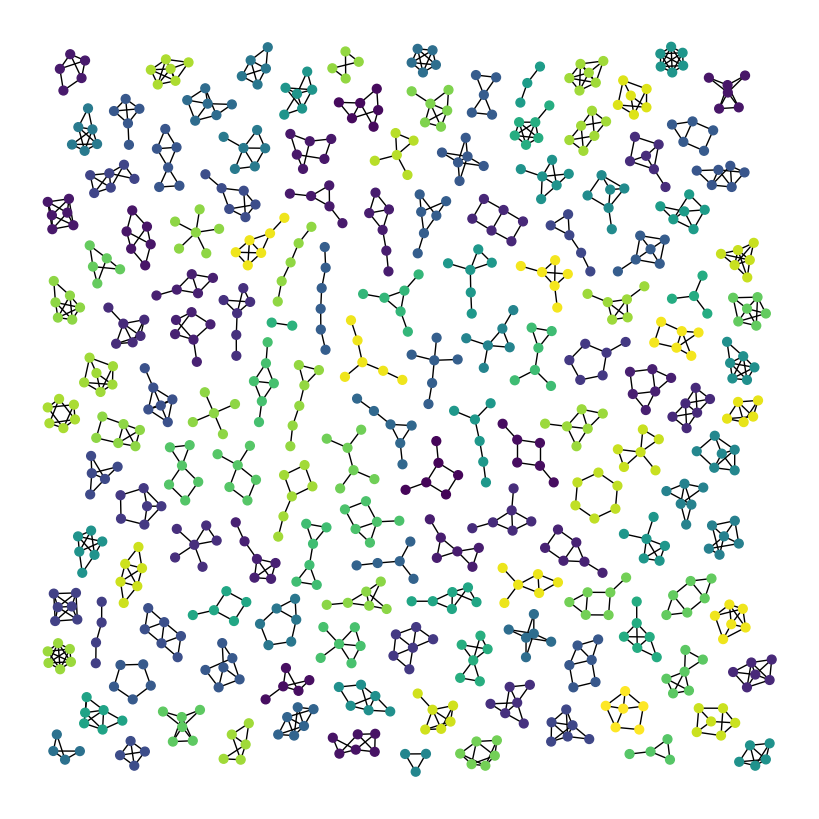

In [1]:
import random

import matplotlib.pyplot as plt
import networkx as nx


GraphMatcher = nx.isomorphism.vf2userfunc.GraphMatcher


def atlas6():
    """Return the atlas of all connected graphs with at most 6 nodes"""

    Atlas = nx.graph_atlas_g()[3:209]  # 0, 1, 2 => no edges. 208 is last 6 node graph
    U = nx.Graph()  # graph for union of all graphs in atlas
    for G in Atlas:
        # check if connected
        if nx.number_connected_components(G) == 1:
            # check if isomorphic to a previous graph
            if not GraphMatcher(U, G).subgraph_is_isomorphic():
                U = nx.disjoint_union(U, G)
    return U


G = atlas6()

print(G)
print(nx.number_connected_components(G), "connected components")

plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = (G.subgraph(c) for c in nx.connected_components(G))
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()

In [3]:
import networkx as nx
G = nx.Graph()

In [7]:
G.add_nodes_from([2, 3])
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [8]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [11]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [12]:
G.add_edges_from([(1, 2), (1, 3)])

In [13]:
G.add_edges_from(H.edges)

In [14]:
G.number_of_nodes()

10

In [15]:
G.number_of_edges()

10

In [18]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

In [22]:
G.degree([2, 3])

DegreeView({2: 2, 3: 3})

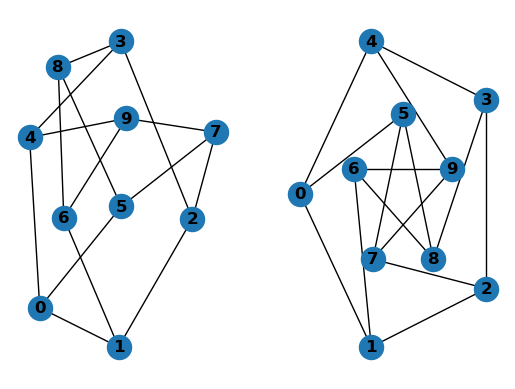

In [24]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()  

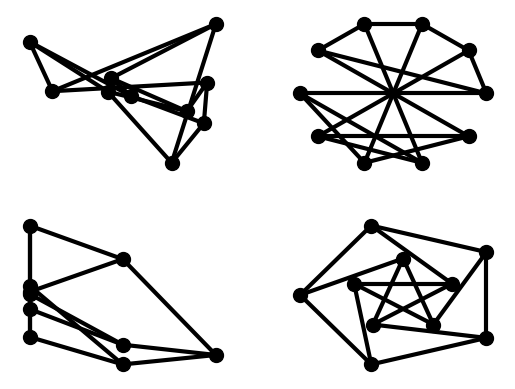

In [25]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

In [ ]:
import random
random.seed(246)        # or any integer
import numpy
numpy.random.seed(4812)